In [37]:
# Importando bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset
df = pd.read_csv('matchs_2023.csv')

# Testando visibilidade do dataset
df.head(5)

C:\Users\yandrade\AppData\Local\Temp\ipykernel_51452\3892024937.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('matchs_2023.csv')


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,122.0,200.0,292.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,-216.0,-579.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [38]:
# Selecionando somente as linhas relacionadas ao CBLOL
df2 = df.loc[df['league'] == 'CBLOL']

# Criando os 2 Dataframes que serão utilizados para obter os dados dos gráficos
df_suportes = df2.loc[df2['position'] == 'sup']

df_suportes = df_suportes.drop(df_suportes.loc[df_suportes['playername'] == 'unknown player'].index)

print(df_suportes)



                       gameid datacompleteness  url league  year    split  \
2332    ESPORTSTMNT03_3087499         complete  NaN  CBLOL  2023  Split 1   
2337    ESPORTSTMNT03_3087499         complete  NaN  CBLOL  2023  Split 1   
2356    ESPORTSTMNT03_3086486         complete  NaN  CBLOL  2023  Split 1   
2361    ESPORTSTMNT03_3086486         complete  NaN  CBLOL  2023  Split 1   
2380    ESPORTSTMNT03_3087532         complete  NaN  CBLOL  2023  Split 1   
...                       ...              ...  ...    ...   ...      ...   
119865  ESPORTSTMNT02_3233840         complete  NaN  CBLOL  2023  Split 2   
119884  ESPORTSTMNT02_3233842         complete  NaN  CBLOL  2023  Split 2   
119889  ESPORTSTMNT02_3233842         complete  NaN  CBLOL  2023  Split 2   
119908  ESPORTSTMNT02_3233843         complete  NaN  CBLOL  2023  Split 2   
119913  ESPORTSTMNT02_3233843         complete  NaN  CBLOL  2023  Split 2   

        playoffs                 date  game  patch  ...  opp_csat15  \
2332

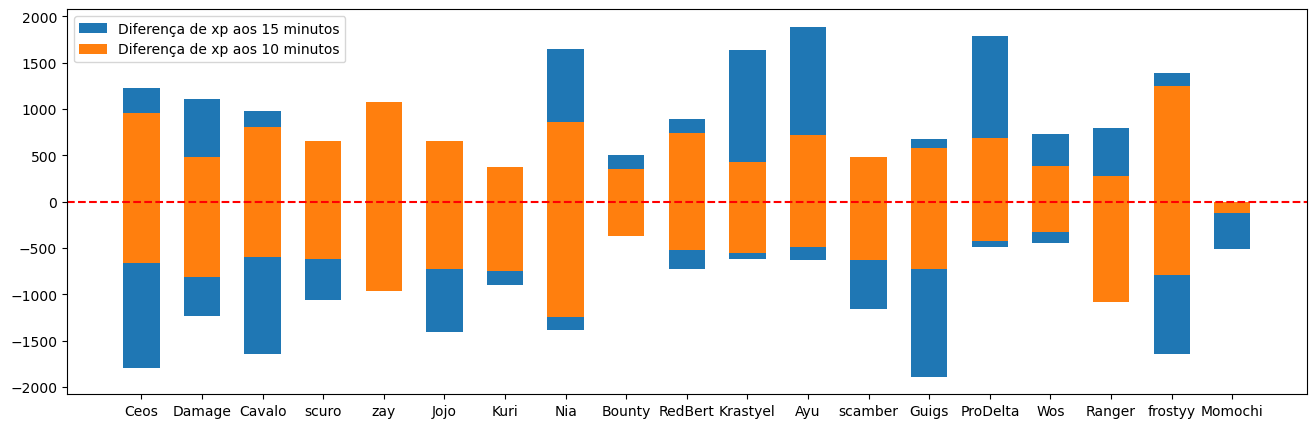

In [39]:
# Aumentando o comprimento da figura
plt.figure(figsize=(16,5))

# Plotando 
plt.bar(
    x=df_suportes['playername'],
    height=df_suportes['xpdiffat15'],
    width=0.6,
    label = 'Diferença de xp aos 15 minutos'
)

plt.bar(
    x=df_suportes['playername'],
    height=df_suportes['xpdiffat10'],
    width=0.6,
    label='Diferença de xp aos 10 minutos'
)

# Criando a linha média
plt.axhline(df_suportes['xpdiffat15'].mean(), color='red', linestyle='--')

# Colocando a legenda e mudando seu posicionamento no gráfico
plt.legend(loc='upper left')

C:\Users\yandrade\AppData\Local\Temp\ipykernel_51452\4055565939.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df_suportes.groupby(df_suportes['playername'])['visionscore', 'vspm'].mean().reset_index()


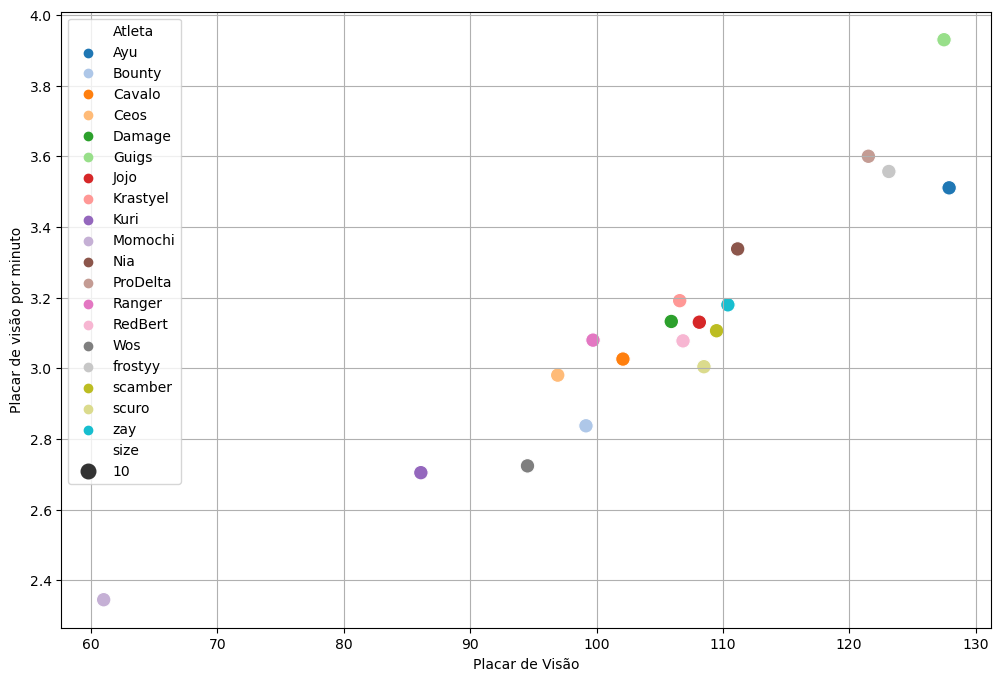

In [40]:
plt.figure(figsize=(12,8))

# Criando um dataframe completo somando dados a partir do nome dos jogadores e gerando uma média deles
# Agrupei os dados pelo nome dos jogadores
# Pedi para que esses dados já filtrados pegassem duas colunas do dataframe original e gerasse uma média deles
# Resetei o index para que a coluna do groupby se tornasse uma coluna do novo dataframe
    #   do contrário a coluna do groupby se torna um index

df3 = df_suportes.groupby(df_suportes['playername'])['visionscore', 'vspm'].mean().reset_index()

# Criando uma função para aplicar o size
def sizing_vision(number):
    size = [number for i in range (19)]
    df3['size'] = size

# Chamando a função
sizing_vision(10)

# Renomeando a coluna para organizar a legenda. Assim o título da legenda não fica 'playername'
df3 = df3.rename(columns={'playername':'Atleta'})

sns.scatterplot(
    data=df3,   # Dataframe de onde eu irei obter os dados
    x=df3['visionscore'],   # Eixo x  do gráfico
    y=df3['vspm'],   # Eixo y do gráfico
    hue=df3['Atleta'],   # Filtro de cores dos dados
    palette='tab20',   # Paleta de cores que será utilizada pelo filtro dos dados
    #style=df3['playername'],   # Muda o estilo dos marcadores de acordo com a legenda
    size=df3['size'],
    sizes=(110,110),
).set(xlabel='Placar de Visão', ylabel='Placar de visão por minuto')   # Mudando os nomes do eixo x e y

plt.legend()
plt.grid()

In [45]:
# Agrupando os valores de K/D/A por jogador e dados de KDA da equipe
df_kda = df_suportes.groupby(df_suportes['playername'])['kills', 'deaths', 'assists', 'teamkills', 'teamdeaths'].mean().reset_index()

# Criando uma função que calcula do K/D/A por linha e adiciona ele na coluna kda_geral
def kda_geral():
    # Loop para adicionar o resultado nas 19 linhas
    for i in range(19):
        # Criando uma variável que irá receber o cálculo de K/D/A
        kda = (df_kda['kills'] + df_kda['assists']) / df_kda['deaths']
        # Criando uma coluna no dataframe que vai recer a variável kda
        df_kda['kda_player'] = kda

# chamando a função
kda_geral()

# Criando um função para colocar o % de participacao de abates
def percent_participacao_abates():
    # Novamente o mesmo loop para adicionar nas 19 linhas o valor
    for i in range(19):
        # Cálculo de participação de abates da equipe
        p_particip = (((df_kda['kills'] + df_kda['assists']) / df_kda['teamkills'])*10)
        # Adicionando a coluna de participação
        df_kda['participacao_abates_%'] = p_particip

percent_participacao_abates()

df_kda.rename(columns={'playername':'Atleta',
                       'kills':'Abates', 
                       'deaths': 'Mortes', 
                       'assists':'Assistências', 
                       'teamkills':'Abates da Equipe', 
                       'teamdeaths':'Abates do Time', 
                       'kda_player':'KDA Atleta'}
            )

C:\Users\yandrade\AppData\Local\Temp\ipykernel_51452\1133584390.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_kda = df_suportes.groupby(df_suportes['playername'])['kills', 'deaths', 'assists', 'teamkills', 'teamdeaths'].mean().reset_index()


,playername,Abates,Mortes,Assistências,Abates da Equipe,Abates do Time,KDA Atleta,participacao_abates_%
0,Ayu,1.142857,2.476190,8.904762,13.476190,11.809524,4.057692,7.455830
1,Bounty,0.500000,3.333333,8.000000,11.166667,16.666667,2.550000,7.611940
2,Cavalo,0.818182,2.681818,6.590909,9.272727,15.500000,2.762712,7.990196
3,Ceos,0.844828,2.293103,10.655172,15.206897,12.017241,5.015038,7.562358
4,Damage,0.400000,3.283333,9.500000,13.666667,13.083333,3.015228,7.243902
5,Guigs,1.833333,2.500000,8.166667,13.333333,14.666667,4.000000,7.500000
6,Jojo,0.613636,2.636364,10.272727,13.772727,12.386364,4.129310,7.904290
7,Krastyel,0.666667,2.916667,10.750000,15.583333,16.916667,3.914286,7.326203
8,Kuri,0.700000,1.300000,9.600000,12.900000,10.200000,7.923077,7.984496
9,Momochi,1.000000,6.000000,1.000000,7.000000,21.000000,0.333333,2.857143


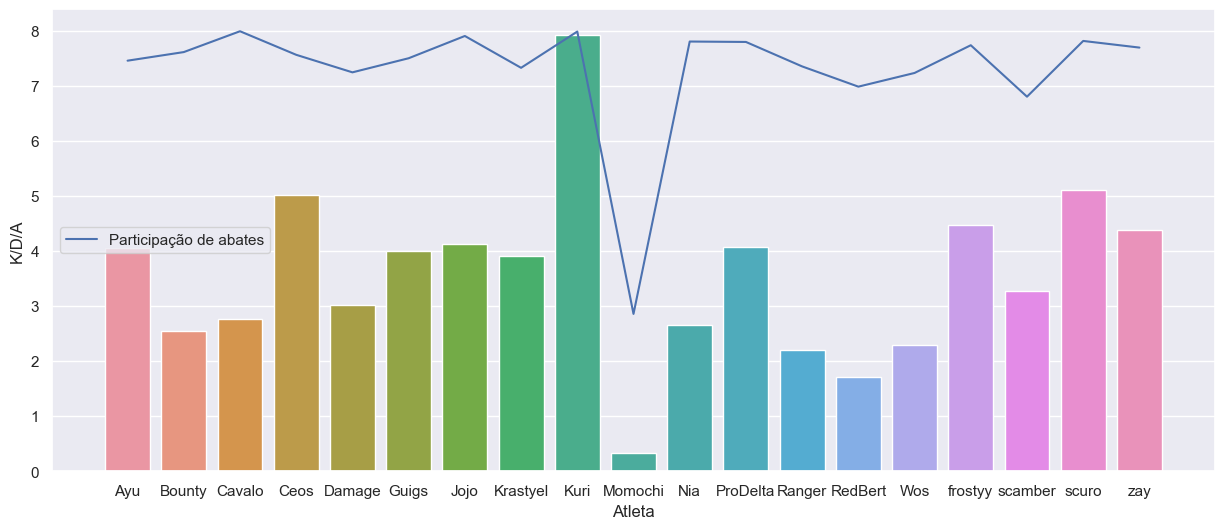

In [54]:
plt.figure(figsize=(15, 6))
sns.set_theme()
sns.barplot(
    data=df_kda,
    x='playername',
    y='kda_player'
).set(xlabel='Atleta', ylabel='K/D/A')

sns.lineplot(
    data=df_kda,
    x='playername',
    y='participacao_abates_%',
    label='Participação de abates'
)

plt.legend(loc='center left')